# HAITLab 第一回小テスト(〜「正則化」)

### 問1 FizzBuzz(3点)
<font size="3" >[アルゴリズム]</font><br>
数字を1からnまでを順に出力する。ただし、3で割り切れる時は、**"Fizz"**、5で割り切れる時は**"Buzz"**、15で割り切れる時は、**"FIzzBuzz"**と数字の代わりに出力する。以下はFizzBuzzゲームの進行例である。


>1 2, Fizz 4 Buzz Fizz 7 8 FizBuzz 11 Fizz 13 14 FizzBuzz 16 17 Fizz 19 Buzz ....

In [1]:
##FizzBuzz 1~100の数字でFIzzBuzzゲームを実装する(3点)
for i in range(1,101):
  out=""
  if i%3==0:
    out+="Fizz"
  if i%5==0:
    out+="Buzz"
  if out=="":
    out+=str(i)
  print(out,end=" ")

        
#endは出力を縦長にしないために書いたため、なくても良い

1 2 Fizz 4 Buzz Fizz 7 8 Fizz Buzz 11 Fizz 13 14 FizzBuzz 16 17 Fizz 19 Buzz Fizz 22 23 Fizz Buzz 26 Fizz 28 29 FizzBuzz 31 32 Fizz 34 Buzz Fizz 37 38 Fizz Buzz 41 Fizz 43 44 FizzBuzz 46 47 Fizz 49 Buzz Fizz 52 53 Fizz Buzz 56 Fizz 58 59 FizzBuzz 61 62 Fizz 64 Buzz Fizz 67 68 Fizz Buzz 71 Fizz 73 74 FizzBuzz 76 77 Fizz 79 Buzz Fizz 82 83 Fizz Buzz 86 Fizz 88 89 FizzBuzz 91 92 Fizz 94 Buzz Fizz 97 98 Fizz Buzz 

### 問2 Matplotlib/numpy(15点)
`fruits.txt`という10種類の果物を1000個書き込んだテキストファイルがある。
`fruits.txt`は以下の形式である。`¥n`は改行コードである。
```
apple¥n
banana¥n
   .
   .
   .
```

このファイルを解析する以下の問いに答えよ

In [2]:
#一度だけ実行すること

#randomをimportする
import random
random.seed(1)

#fruits.txtファイルを作成する
with open('fruits.txt','w') as f:
    for _ in range(1000):
        f.write(random.choice(['apple', 'orange', 'strawberry', 'cherry', 'plum','banana', 'grape','lime', 'peach', 'watermelon'])+'\n')

### (1)`fruits.txt`からデータを読み込み、list型の変数`fruits`を作成せよ(2点)
>fruits = [apple,banana, ....]

<font size="3" >[ヒント]</font>  
ファイルの読み込みには`with open('filepath','r') as f`を使う

In [3]:
#listにする(2点)
with open('fruits.txt','r') as f:
    fruits=f.read().splitlines()
f.close() 

### (2)`fruits`にある果物の種類を表示するlist型の変数`fruits_list`の作成及び、果物の数を表示せよ。(3点)

In [4]:
#fruits_listの作成(2点)
fruits_list=list(set(fruits))

#果物の数を表示(1点)
len(fruits)

1000

### (3)`fruits`に果物がそれぞれ何個ずつあるのかを表示するdict型の変数`fruits_num`を作成せよ(3点)
> fruits_num = {'peach': 10, 'melon'30, ....}

In [5]:
# fruits_numの作成(3点)
fruits_num=dict.fromkeys(fruits_list,0)
for f in fruits:
  fruits_num[f]+=1

### (4)matplotlibを用いてfruits_numを以下の指示に従って可視化せよ。(3点)
1. 棒グラフで表示する。
1. 縦軸は果物の個数,横軸は果物名をラベルとする。
1. ラベルが重ならないように工夫すること。
1. グラフのタイトル、縦軸、横軸のキャプションをつけること。

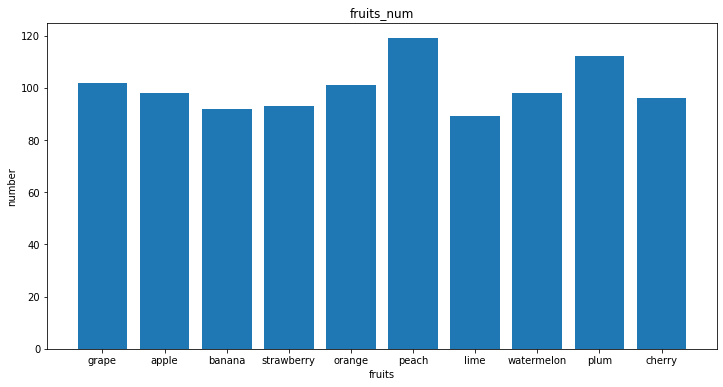

In [7]:
#グラフの表示(3点)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(fruits_num.keys(),fruits_num.values())
plt.xlabel("fruits")
plt.ylabel("number")
plt.title("fruits_num")
plt.show()

### (5)求めたデータを用いて以下のnumpy配列A,Bを作成せよ(2点)
$$
A = \left(
\begin{matrix} 
 strawberryの個数　 & watermelonの個数　 \\ 
orangeの個数　 & bananaの個数　 
\end{matrix} 
\right)
$$
$$
B = \left(
\begin{matrix} 
 plumの個数　 & grapeの個数　 \\ 
cherryの個数　 & appleの個数　 
\end{matrix} 
\right)
$$

In [8]:
#配列A、Bの作成
import numpy as np
A =np.array([[fruits_num["strawberry"],fruits_num["watermelon"]],[fruits_num["orange"],fruits_num["banana"]]])



B =np.array([[fruits_num["plum"],fruits_num["grape"]],[fruits_num["cherry"],fruits_num["apple"]]])


print(A) #1点
print(B) #1点

[[ 93  98]
 [101  92]]
[[112 102]
 [ 96  98]]


### (6)行列の和`A+B`及び、内積`A・B`を表示せよ(2点)

In [9]:
#行列の和の表示 #1点
print(A+B)

#行列の内積の表示 #1点
print(np.dot(A,B))


[[205 200]
 [197 190]]
[[19824 19090]
 [20144 19318]]


### 問3 線形回帰(12点)

ワインデータセットを用いて、ワインの品質を回帰分析によって予測する問題を考える。  

In [10]:
# コード改変禁止
# データをインポート
import pandas as pd

data1 = pd.read_csv('./test_data.csv')
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### (1) 説明変数と目的変数'quality'との相関係数行列を出力し、相関の強い変数を順番に3つ答えてください。(2点)

In [12]:
# 相関係数行列を出力(1点)
data1.corr()["quality"]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

#### 相関の強い変数を順番にMarkdown形式で3つ答えてください。(1点)
相関が強いものから、alcohol,volatile acidity,sulphates


### (2) 以下の指示にしたがってデータの前処理を行ってください。(4点)

In [13]:
#sklearn.model_selectionからtrain_test_splitをimportする
from sklearn.model_selection import train_test_split

#sklearn.preprocessingからStandardScalerimportする
from sklearn.preprocessing import StandardScaler
#(全1点)

In [24]:
# Xに(1)で選んだ３つの変数、yに'quality' の値を代入してください。(1点)
X=data1.loc[:,["alcohol","volatile acidity","sulphates"]].values
y=data1.loc[:,["quality"]].values


# X, yに対してデータの標準化を行ってください。(1点)
ss=StandardScaler()
X_ss=ss.fit_transform(X)
y_ss=ss.fit_transform(y)



# ホールドアウト法でデータを分割してください。ただし、trainデータの割合75%,とする。(1点)
X_ss_train,X_ss_test,y_ss_train,y_ss_test= train_test_split(X_ss,y_ss,test_size=0.25)


### (3) 以下の指示にしたがって線形回帰モデルを学習させ、性能評価を行ってください。(4点)

In [26]:
#sklearn.linear_modelからLinearRegressionをimportする
from sklearn.linear_model import LinearRegression

#sklearn.metricsからmean_squared_errorをmseとしてimportする
from sklearn.metrics import mean_squared_error as mse
#(全1点)

In [33]:
# 線形回帰インスタンスを生成(1点)
model = LinearRegression()

# 重回帰分析の学習を行ってください(1点)
model.fit(X_ss_train,y_ss_train)

# trainデータとtestデータのそれぞれについてRMSE(平均二乗誤差の平方根)を出力してください(1点)
print("train: "+str(mse(y_ss_train,model.predict(X_ss_train))**0.5))
print("test: "+str(mse(y_ss_test,model.predict(X_ss_test))**0.5))





train: 0.7958726308540381
test: 0.8710954841901893


### (4) 学習モデルの標準変回帰係数を出力し、重要度の高い変数を順番に3つ答えてください。(2点)

In [29]:
# 標準変回帰係数の出力(1点)
model.coef_

array([[ 0.40287844, -0.29668323,  0.13941935]])

#### 重要度の強い変数を順番にMarkdown形式で3つ答えてください。(1点)
重要度が強いものから、